<a href="https://colab.research.google.com/github/aguvilte/diplodatos/blob/master/02_practico_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn

In [0]:
seaborn.__version__

'0.9.0'

In [0]:
dataset = pandas.read_csv('https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-data-update.csv')
dataset.shape

(1458, 124)

In [0]:
dataset.columns  # Way too many columns!

Index(['Unnamed: 0', 'year', 'ISO_code', 'countries', 'region', 'hf_score',
       'hf_rank', 'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=124)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [0]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [0]:
dataset = dataset[important_cols]
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

### Respuestas

#### 1.1

In [0]:
num_columns = dataset.iloc[:,4:]
for col in num_columns:
    print('Rango de', col, '=', dataset[col].max() - dataset[col].min())

Rango de pf_identity_legal = 10.0
Rango de pf_identity_parental_marriage = 10.0
Rango de pf_identity_parental_divorce = 10.0
Rango de pf_identity_parental = 10.0
Rango de pf_identity_sex_male = 10.0
Rango de pf_identity_sex_female = 10.0
Rango de pf_identity_sex = 10.0
Rango de pf_identity_divorce = 10.0
Rango de pf_identity = 10.0
Rango de ef_score = 6.31
Rango de ef_rank = 161.0
Rango de hf_score = 5.360486062652411
Rango de hf_rank = 161.0


#### 1.2

In [0]:
print('Media de pf_identity en el mundo =', dataset['pf_identity'].mean())
print('Media pf_identity en Latinoamérica y El Caribe =', dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].mean(),'\n')
print('Mediana de pf_identity en el mundo =', dataset['pf_identity'].median())
print('Mediana de pf_identity en Latinoamérica y El Caribe =', dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].median(),'\n')
print('Desviación estándar de pf_identity en el mundo =', dataset['pf_identity'].std())
print('Desviación estándar de pf_identity en Latinoamérica y El Caribe =', dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].std(),'\n')

print('Media de hf_score en el mundo =', dataset['hf_score'].mean())
print('Media hf_score en Latinoamérica y El Caribe =', dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].mean(),'\n')
print('Mediana de hf_score en el mundo =', dataset['hf_score'].median())
print('Mediana de hf_score en Latinoamérica y El Caribe =', dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].median(),'\n')
print('Desviación estándar de hf_score en el mundo =', dataset['hf_score'].std())
print('Desviación estándar de hf_score en Latinoamérica y El Caribe =', dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].std(),'\n')

Media de pf_identity en el mundo = 7.334179970972424
Media pf_identity en Latinoamérica y El Caribe = 8.765086206896552 

Mediana de pf_identity en el mundo = 9.166666666666666
Mediana de pf_identity en Latinoamérica y El Caribe = 10.0 

Desviación estándar de pf_identity en el mundo = 3.1594726614757107
Desviación estándar de pf_identity en Latinoamérica y El Caribe = 1.7117319741602557 

Media de hf_score en el mundo = 6.993443755529016
Media hf_score en Latinoamérica y El Caribe = 7.047981929965801 

Mediana de hf_score en el mundo = 6.923840432887828
Mediana de hf_score en Latinoamérica y El Caribe = 7.0280447399738755 

Desviación estándar de hf_score en el mundo = 1.025811161178785
Desviación estándar de hf_score en Latinoamérica y El Caribe = 0.6089040915655242 



**Respuesta**: No tiene sentido calcular la moda debido a que pf_identity y hf_score son variables cuantitativas continuas. Para que el cálculo de la moda tenga sentido, deberíamos definir intervalos.

#### 1.3

**Respuesta**: No todos los valores de pf_identity y hf_score son directamente comparables debido a que son variables subjetivas. Por lo tanto dependen de la apreciación de personas que pueden tener paradigmas culturales diferentes. Una variable que podría influir es, por ejemplo, la región.

#### 1.4

**Respuesta**: Una opción para sanear los valores faltantes sería utilizar el promedio de la región a la cual pertenece el país.

In [0]:
dataset_latam = pandas.DataFrame(dataset[dataset['region'] == 'Latin America & the Caribbean'])
dataset_latam = dataset_latam.fillna(dataset_latam.mean())

# También se puede sanear con la función dropna
# Por ejemplo: dataset_latam = dataset_latam.dropna()

# Podemos imprimir la media para saber si los valores nulos han sido "saneados" correctamente
print('Media de pf_identity en Latinoamérica y El Caribe =', dataset_latam['pf_identity'].mean())

Media de pf_identity en Latinoamérica y El Caribe = 8.765086206896552


#### 1.5

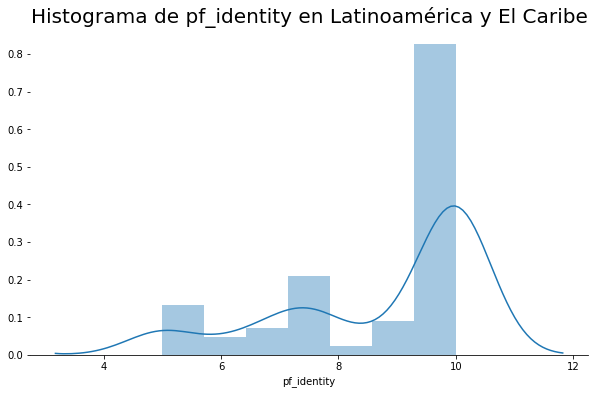

In [0]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset_latam['pf_identity'])
plt.title('Histograma de pf_identity en Latinoamérica y El Caribe', size=20)
seaborn.despine(left=True)

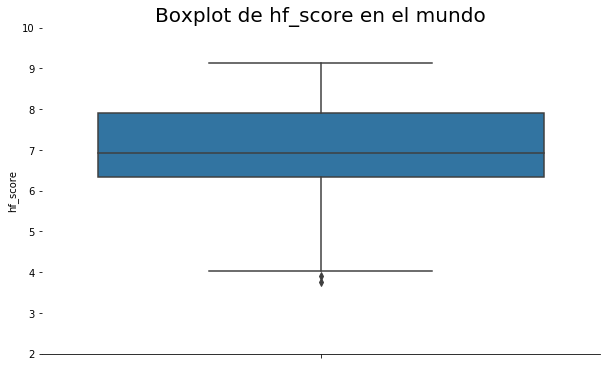

In [0]:
plt.figure(figsize=(10,6))
seaborn.boxplot(y=dataset['hf_score'])
plt.title('Boxplot de hf_score en el mundo', size=20)
plt.ylim(2,10)
seaborn.despine(left=True)

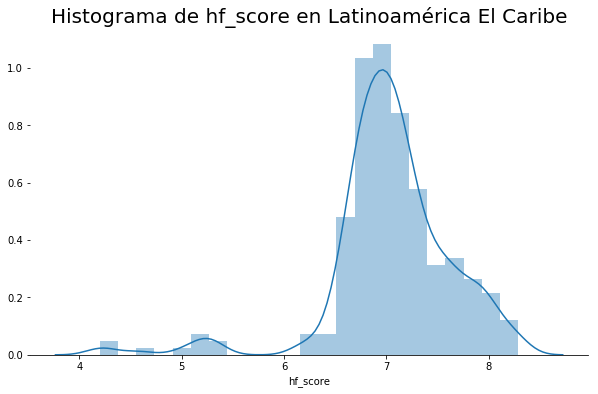

In [0]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset_latam['hf_score'])
plt.title('Histograma de hf_score en Latinoamérica El Caribe', size=20)
seaborn.despine(left=True)

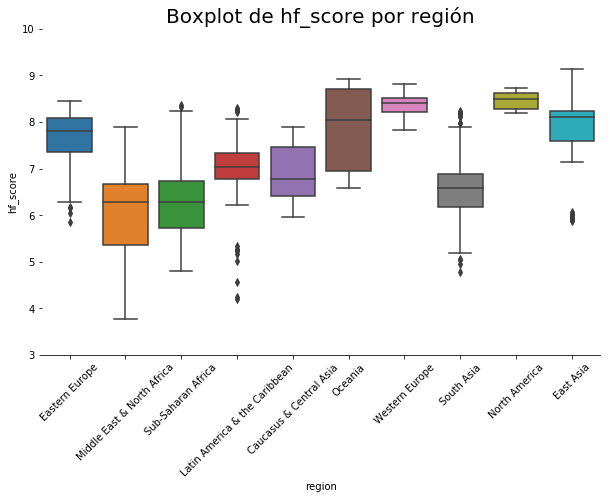

In [0]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset, y='hf_score', x='region')
plt.title('Boxplot de hf_score por región', size=20)
plt.ylim(3,10)
plt.xticks(rotation=45)
seaborn.despine(left=True)

**Respuesta**: Existen outliers analizando todos los países en conjunto y en mayor medida cuando el análisis es por región. Sólo eliminaríamos los outliers que aparecen cuando se analizan todos los países en conjunto.
Para detectar los valores atípicos utilizamos box plots.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

### Respuestas

#### 2.1

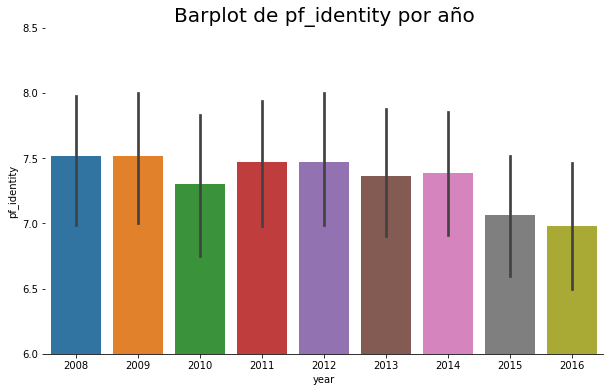

In [0]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, y='pf_identity', x='year')
plt.title('Barplot de pf_identity por año', size=20)
plt.ylim(6,8.5)
seaborn.despine(left=True)

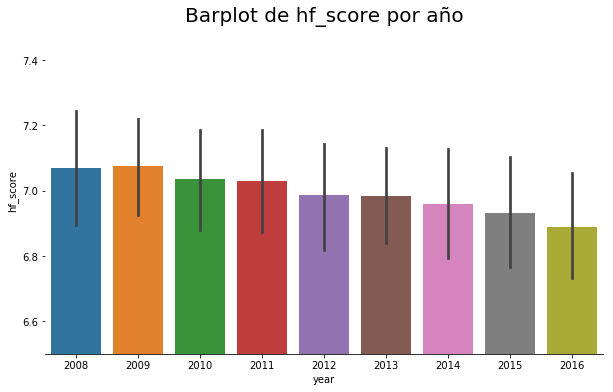

In [0]:
plt.figure(figsize=(10,6))
seaborn.barplot(data=dataset, y='hf_score', x='year')
plt.title('Barplot de hf_score por año', size=20)
plt.ylim(6.5,7.5)
seaborn.despine(left=True)

#### 2.2

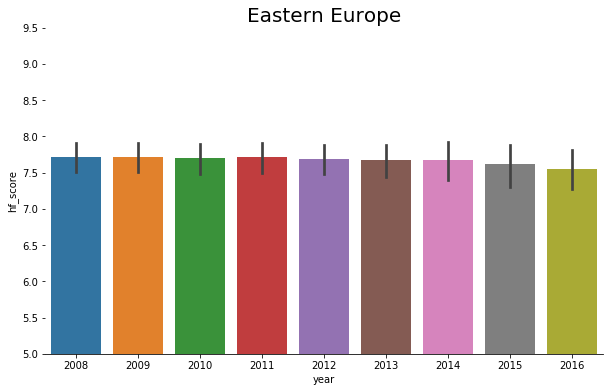

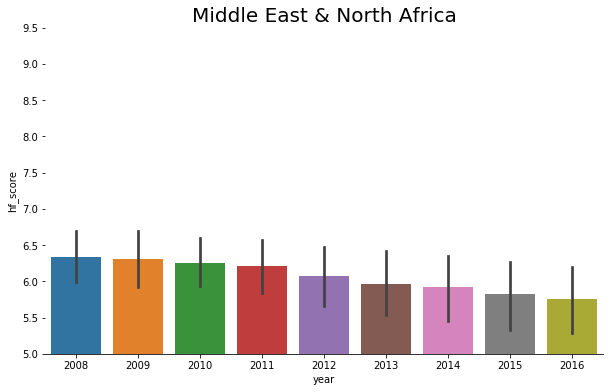

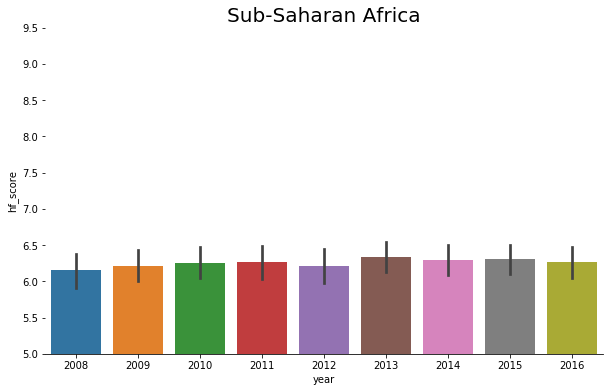

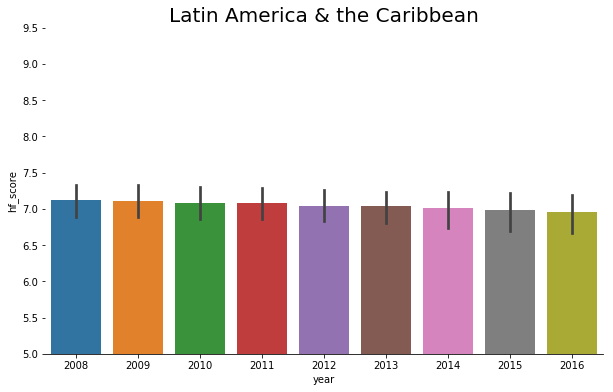

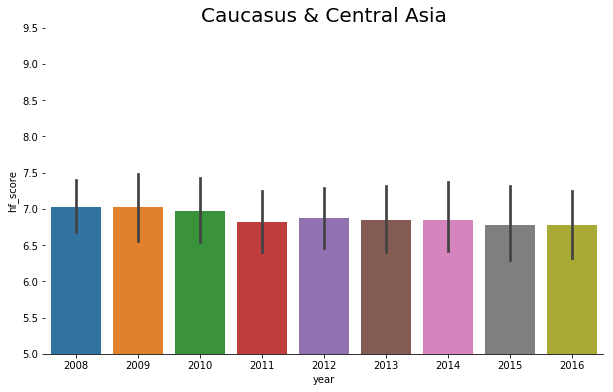

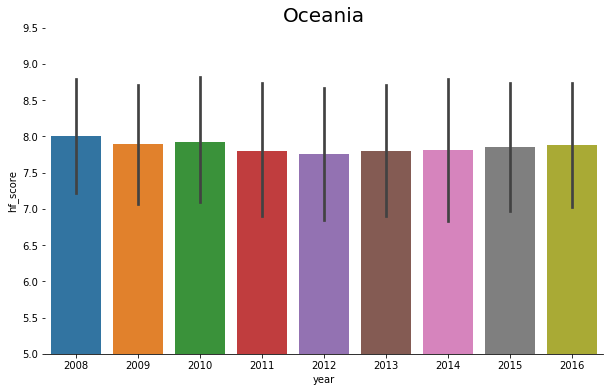

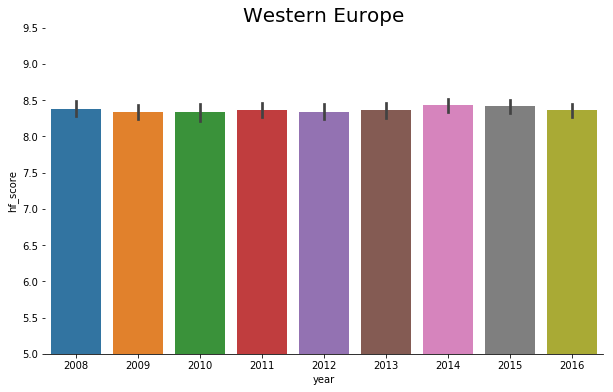

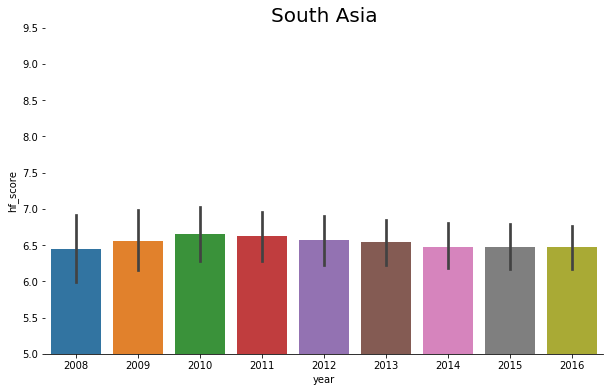

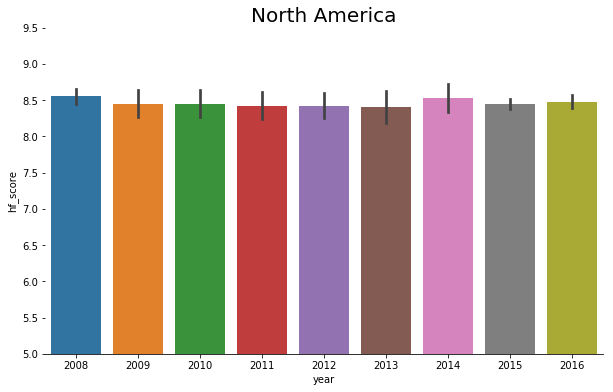

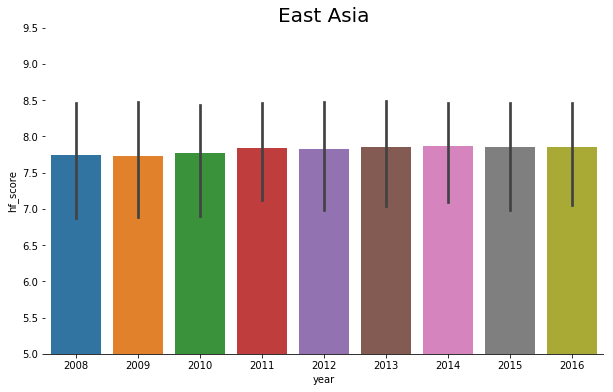

In [0]:
regions = dataset['region'].unique()
for region in regions:
  plt.figure(figsize=(10,6))
  seaborn.barplot(data=dataset[dataset['region'] == region], y='hf_score', x='year')
  plt.title(region, size=20)
  plt.ylim(5,9.5)
  seaborn.despine(left=True)

**Respuesta**: La tendencia observada cambia al dividir por regiones.

#### 2.3

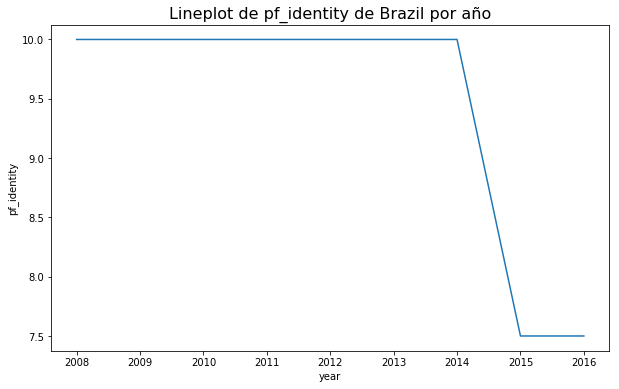

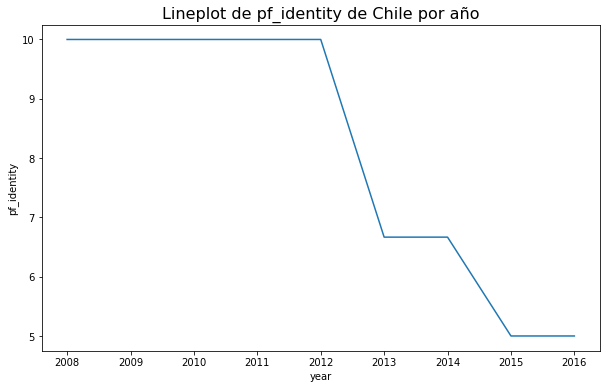

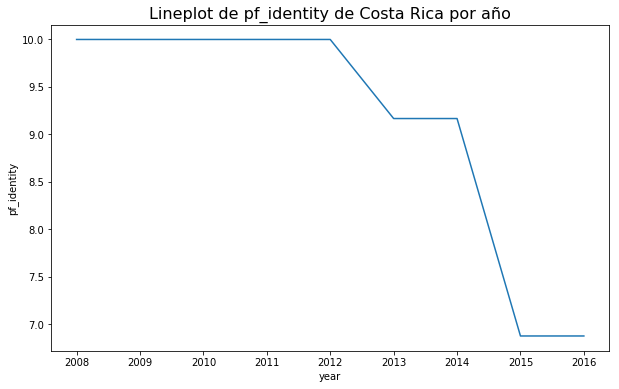

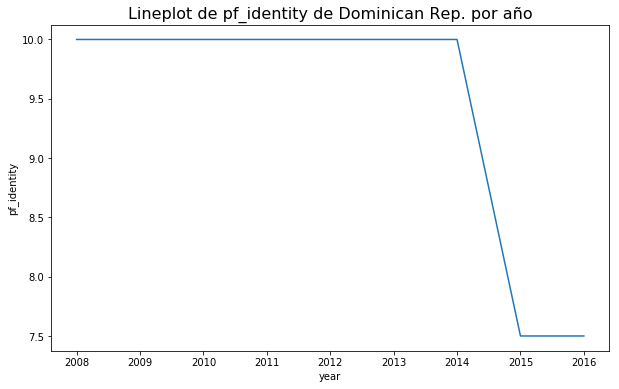

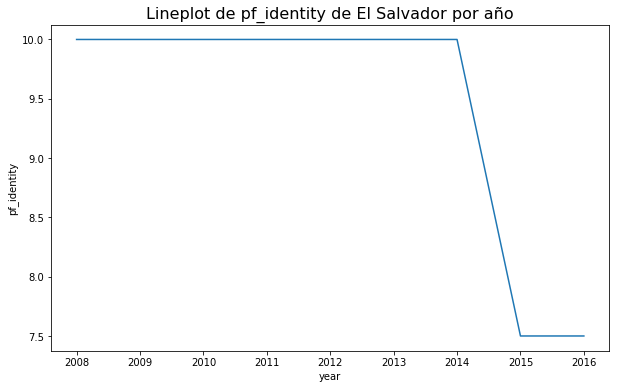

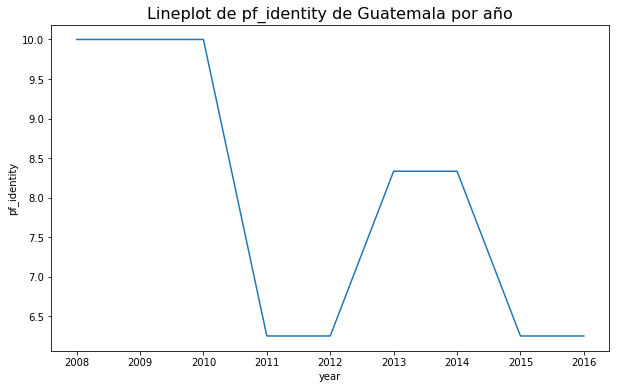

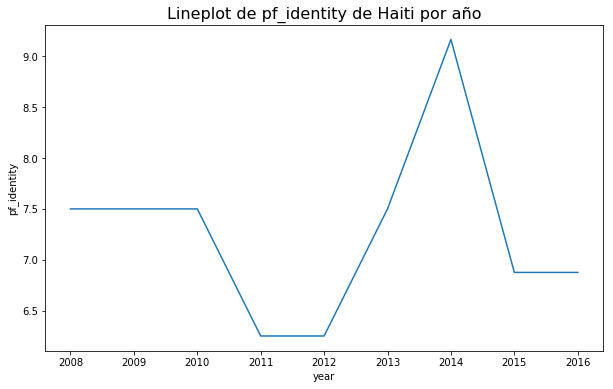

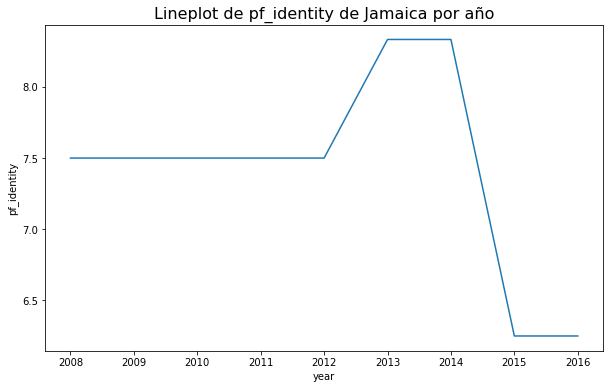

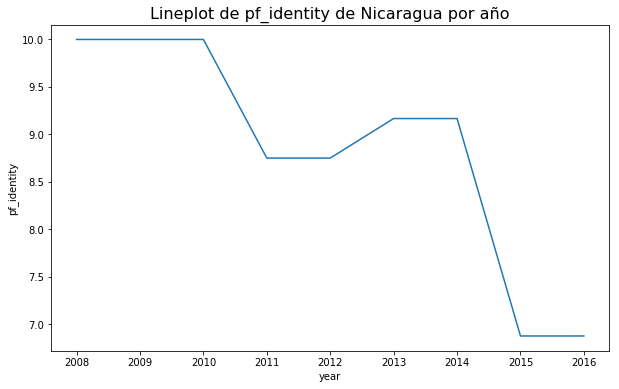

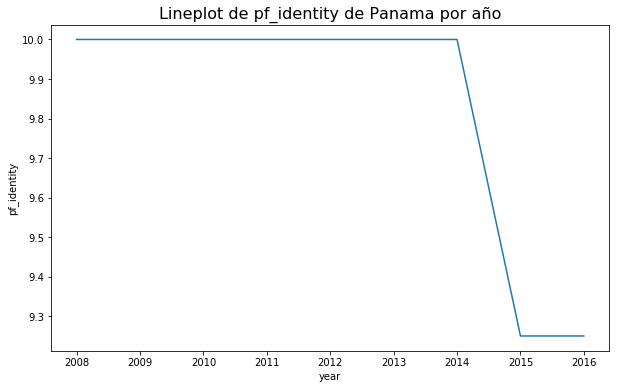

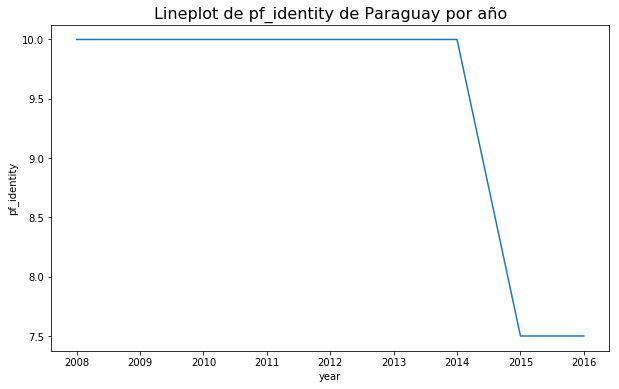

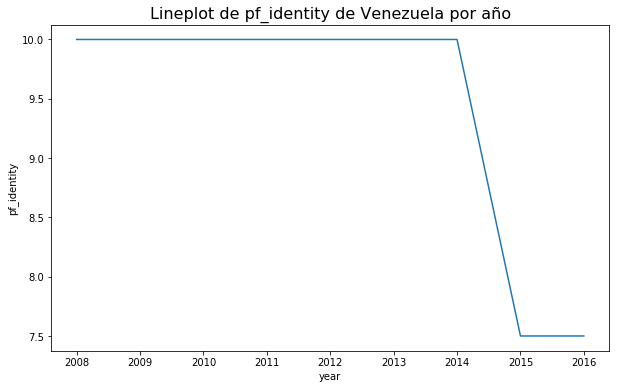

In [0]:
countries = list(dataset_latam['countries'].unique())

for country in countries:
  result = dataset_latam[dataset_latam['countries'] == country]['pf_identity']
  result = pandas.Series.tolist(result)
  result = result[8] - result[0]
  if result > 0:
    plt.figure(figsize=(10,6))
    plt.title('Lineplot de pf_identity de ' + country + ' por año', size=16)
    seaborn.lineplot(data=dataset_latam[dataset_latam['countries'] == country], y='pf_identity', x='year', ci=None)

**Respuesta**: Para seleccionar los países que explican la tendencia de la región filtramos primero a aquellos que hayan tenido una evolución en el mismo sentido que la región en conjunto. Luego, elegimos a aquellos que muestran una mayor tasa de cambio.

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

### RESPUESTAS

#### 3.1

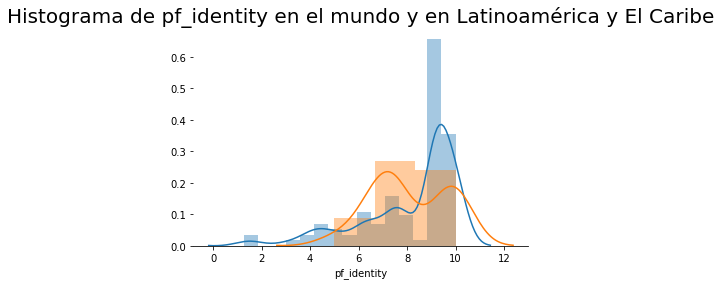

In [0]:
new_dataset = dataset.dropna()

seaborn.distplot(new_dataset['pf_identity'])
seaborn.distplot(new_dataset[new_dataset['region'] == 'Latin America & the Caribbean']['pf_identity'])
plt.title('Histograma de pf_identity en el mundo y en Latinoamérica y El Caribe', size=20)
seaborn.despine(left=True)

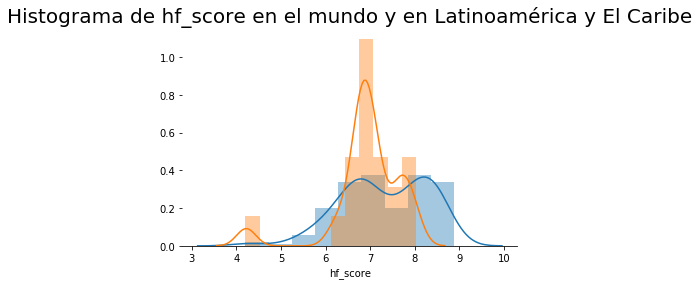

In [0]:
new_dataset = dataset.dropna()

seaborn.distplot(new_dataset['hf_score'])
seaborn.distplot(new_dataset[new_dataset['region'] == 'Latin America & the Caribbean']['hf_score'])
plt.title('Histograma de hf_score en el mundo y en Latinoamérica y El Caribe', size=20)
seaborn.despine(left=True)

**Respuesta**: La variable pf_identity en global muestra una distribución unimodal, asimétrica hacia la izquierda. En cambio, en Latinoamérica y El Caribe la distribución es bimodal.
La variable hf_score muestra una distribución bimodal, tanto a nivel global como para Latinoamérica.

#### 3.2

In [0]:
from scipy import stats

pf_identity = np.array(new_dataset['pf_identity'])
hf_score = np.array(new_dataset['hf_score'])

zscore_pf_identity = stats.zscore(pf_identity)
zscore_hf_score = stats.zscore(hf_score)

ks_pf_identity = stats.kstest(zscore_pf_identity , 'norm')
ks_hf_score = stats.kstest(zscore_hf_score , 'norm')

print('Kolmogorov-Smirnov de pf_identity:', ks_pf_identity)
print('Kolmogorov-Smirnov de hf_score:', ks_hf_score)


Kolmogorov-Smirnov de pf_identity: KstestResult(statistic=0.29937490383956455, pvalue=7.782149160837299e-16)
Kolmogorov-Smirnov de hf_score: KstestResult(statistic=0.0949538468802461, pvalue=0.057639783371181925)


**Respuesta**: De la prueba Kolmogorov Smirnov surge que la variable pf_identity no presenta una distribución normal. En cambio, para la variable hf_score la hipótesis nula será rechazada o aceptada en función del nivel de confianza definido. (Para un nivel de confianza del 95% se acepta la hipótesis nula mientras que para un nivel del 90% es rechazada)

#### 3.3

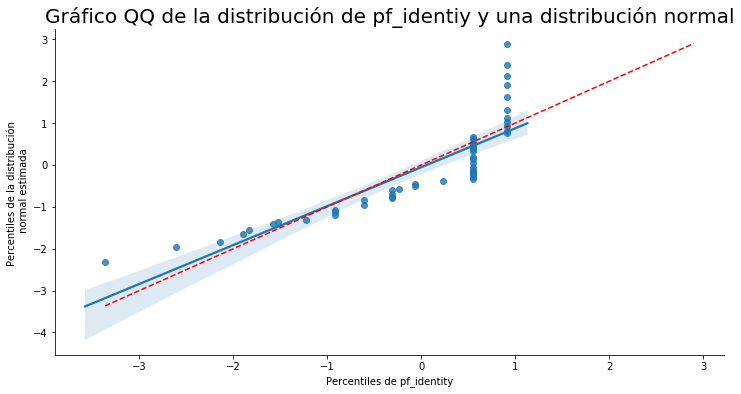

In [0]:
loc, scale = stats.norm.fit(zscore_pf_identity)
loc, scale
norm_dist = stats.norm(loc, scale)
percs = np.linspace(0,100,51)
qn_sample = np.percentile(zscore_pf_identity, percs)
qn_norm_dist = np.percentile(norm_dist.rvs(len(zscore_pf_identity)), percs)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de pf_identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identiy y una distribución normal', size=20)

x = np.linspace(np.min((qn_sample.min(), qn_norm_dist.min())), np.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='RED', ls="--")

seaborn.despine()


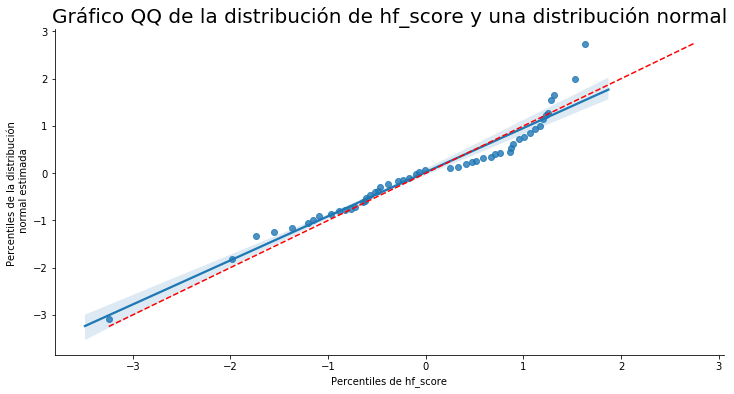

In [0]:
qn_sample = np.percentile(zscore_hf_score, percs)
qn_norm_dist = np.percentile(norm_dist.rvs(len(zscore_hf_score)), percs)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de hf_score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal', size=20)

x = np.linspace(np.min((qn_sample.min(), qn_norm_dist.min())), np.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='RED', ls="--")

seaborn.despine()

#### 3.4

In [0]:
print('Asimetría de pf_identity =', new_dataset['pf_identity'].skew())
print('Asimetría de hf_score =', new_dataset['hf_score'].skew(),'\n')

# Se puede validar con la distribución normal 
# Ejemplo para pf_identity: pandas.DataFrame(zscore_pf_identity[1:], index=zscore_pf_identity[1:]).skew()
# Ejemplo para hf_score: pandas.DataFrame(zscore_hf_score[1:], index=zscore_hf_score[1:]).skew()

print('Curtosis de pf_identity =', new_dataset['pf_identity'].kurtosis())
print('Curtosis de hf_score =', new_dataset['hf_score'].kurtosis())

# Se puede validar con la distribución normal 
# Ejemplo para pf_identity: pandas.DataFrame(zscore_pf_identity[1:], index=zscore_pf_identity[1:]).kurtosis()
# Ejemplo para hf_score: pandas.DataFrame(zscore_hf_score[1:], index=zscore_hf_score[1:]).kurtosis()

Asimetría de pf_identity = -1.3517156215974289
Asimetría de hf_score = -0.45072852267691443 

Curtosis de pf_identity = 1.1898582111930938
Curtosis de hf_score = -0.2295568868686102


**Respuesta**: Los valores de asimetría y curtosis correspondientes a estas distribuciones confirman las conclusiones obtenidas en el punto anterior ya que para una distribución normal los valores son iguales a cero.
Estos estadísticos proveen mayor información que el QQ plot ya que éste sólo nos indica qué tanto se asimila una distribución a una normal. Los estadísticos brindan información, además, acerca del sentido de la asimetría o curtosis que una distribución presenta.

## 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


### RESPUESTAS

<Figure size 864x432 with 0 Axes>

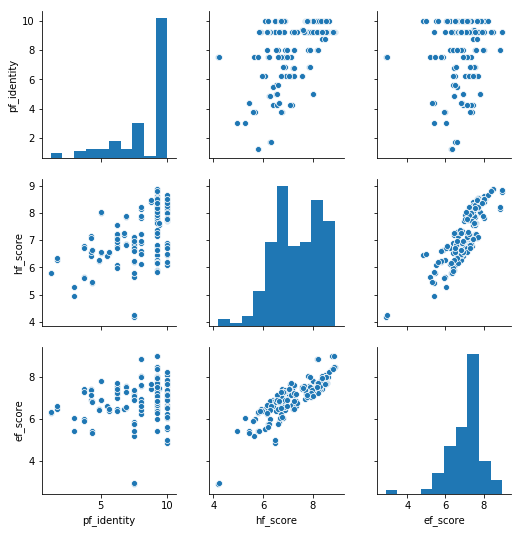

In [0]:
plt.figure(figsize=(12,6))
seaborn.pairplot(new_dataset, vars=['pf_identity', 'hf_score', 'ef_score'])
seaborn.despine()

In [0]:
co_pearson = pandas.DataFrame(new_dataset, columns=['pf_identity', 'hf_score', 'ef_score']).corr(method='pearson')
co_spearman = pandas.DataFrame(new_dataset, columns=['pf_identity', 'hf_score', 'ef_score']).corr(method='spearman')
co_kendall = pandas.DataFrame(new_dataset, columns=['pf_identity', 'hf_score', 'ef_score']).corr(method='kendall')

print('Coeficiente de Pearson')
print(co_pearson)
print('\n')

print('Coeficiente de Spearman')
print(co_spearman)
print('\n')

print('Coeficiente de Kendall')
print(co_kendall)



Coeficiente de Pearson
             pf_identity  hf_score  ef_score
pf_identity     1.000000  0.537288  0.256116
hf_score        0.537288  1.000000  0.858480
ef_score        0.256116  0.858480  1.000000


Coeficiente de Spearman
             pf_identity  hf_score  ef_score
pf_identity     1.000000  0.470673  0.249309
hf_score        0.470673  1.000000  0.888964
ef_score        0.249309  0.888964  1.000000


Coeficiente de Kendall
             pf_identity  hf_score  ef_score
pf_identity     1.000000  0.353405  0.180660
hf_score        0.353405  1.000000  0.710643
ef_score        0.180660  0.710643  1.000000



**Respuesta**: Luego de analizar el pairplot y los coeficientes de correlación se concluye que hf_score y ef_score presentan una correlación positiva. Mientras que pf_identity no se correlaciona con ninguna de las anteriores. 
El coeficiente de correlación que corresponde en este caso es el de Spearman debido a que la distribución de las variables no es normal.

In [0]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import spearmanr
print('Correlación entre región y hf score')
print(spearmanr(new_dataset['region'], new_dataset['hf_score']))
print('Correlación entre región y pf_identity')
print(spearmanr(new_dataset['region'], new_dataset['pf_identity']))

Correlación entre región y hf score
SpearmanrResult(correlation=0.14994287062286404, pvalue=0.03740440292515909)
Correlación entre región y pf_identity
SpearmanrResult(correlation=-0.061971232729781806, pvalue=0.3919079097876651)


**Respuesta**: No existe correlación entre ninguna de estas variables.